In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

2021-12-19 02:25:57.767007: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-19 02:25:57.767045: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

In [5]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [6]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [8]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [9]:
#Trains the model for a fixed number of epochs (iterations on a dataset).
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 24s 26ms/step - loss: 1.5179 - accuracy: 0.4471 - val_loss: 0.3170 - val_accuracy: 0.9065
Epoch 2/40
907/907 [==============================] - 34s 38ms/step - loss: 0.3842 - accuracy: 0.8793 - val_loss: 0.1952 - val_accuracy: 0.9430
Epoch 3/40
907/907 [==============================] - 34s 38ms/step - loss: 0.2986 - accuracy: 0.9061 - val_loss: 0.1840 - val_accuracy: 0.9465
Epoch 4/40
907/907 [==============================] - 25s 27ms/step - loss: 0.2517 - accuracy: 0.9193 - val_loss: 0.1509 - val_accuracy: 0.9550
Epoch 5/40
907/907 [==============================] - 25s 27ms/step - loss: 0.2237 - accuracy: 0.9282 - val_loss: 0.1365 - val_accuracy: 0.9625
Epoch 6/40
907/907 [==============================] - 22s 25ms/step - loss: 0.2031 - accuracy: 0.9342 - val_loss: 0.1084 - val_accuracy: 0.9695
Epoch 7/40
907/907 [==============================] - 29s 32ms/step - loss: 0.1848 - accuracy: 0.9403 - val_loss: 0.1400 - val_accuracy:

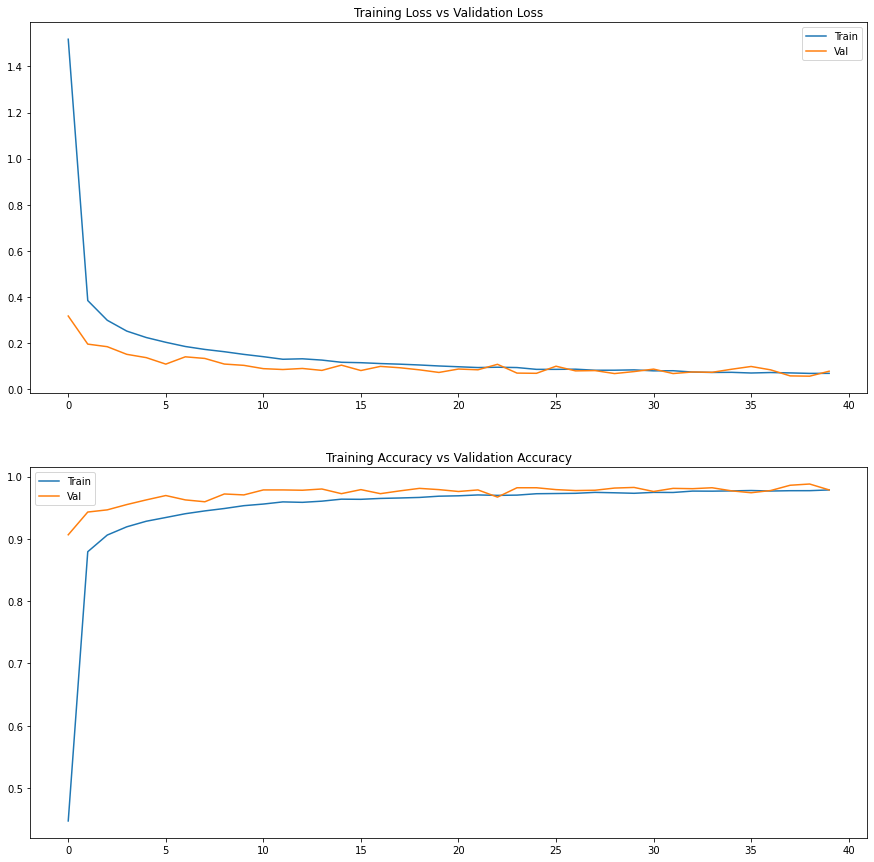

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])


In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0777 - accuracy: 0.9749


[0.07772862166166306, 0.9749000072479248]

In [12]:
model.save('bestmodel_lenet.h5')